#### Datawhale零基础入门NLP赛事 - Task2数据读取与数据分析

# Task2数据读取与数据分析

## 数据读取

In [1]:
import pandas as pd
train = pd.read_csv('D:/datalab/nlp/train_set.csv', sep='\t')
test = pd.read_csv('D:/datalab/nlp/test_a.csv', sep='\t')

## 数据分析

In [2]:
train.head(5)

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


### 新闻类别分布

Text(0.5, 0, 'category')

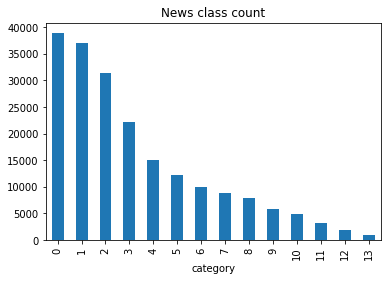

In [6]:
import matplotlib.pyplot as plt
train['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}


从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

### 句子长度分析

In [9]:
%pylab inline
train['text_len'] = train['text'].apply(lambda x: len(x.split(' ')))
print(train['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。

Text(0.5, 1.0, 'Histogram of char count')

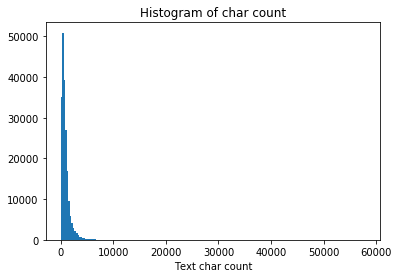

In [10]:
_ = plt.hist(train['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

将句子长度绘制了直方图，可见大部分句子的长度都几种在2000以内。

### 字符分布统计

In [13]:
from collections import Counter
all_lines = ' '.join(list(train['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

MemoryError: 

In [15]:
train['text_unique'] = train['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

In [16]:
print(word_count[0])

('3750', 197997)


In [17]:
print(word_count[1])

('900', 197653)


In [18]:
print(word_count[2])

('648', 191975)


## 数据分析的结论

通过上述分析我们可以得出以下结论：

- 赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
- 赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
- 赛题总共包括7000-8000个字符；

通过数据分析，我们还可以得出以下结论：

- 每个新闻平均字符个数较多，可能需要截断；
- 由于类别不均衡，会严重影响模型的精度；

## 本章作业

1.假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？

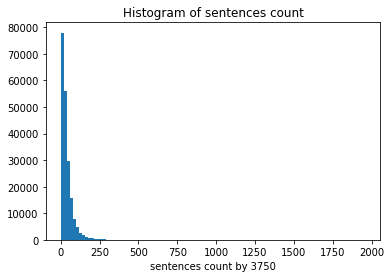

count    200000.00000
mean         37.41112
std          40.87367
min           0.00000
25%          13.00000
50%          26.00000
75%          48.00000
max        1959.00000
Name: n_sentences_by_3750, dtype: float64


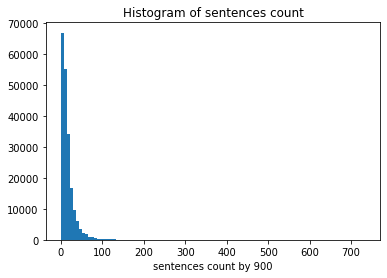

count    200000.000000
mean         16.312720
std          18.024758
min           0.000000
25%           6.000000
50%          11.000000
75%          21.000000
max         734.000000
Name: n_sentences_by_900, dtype: float64


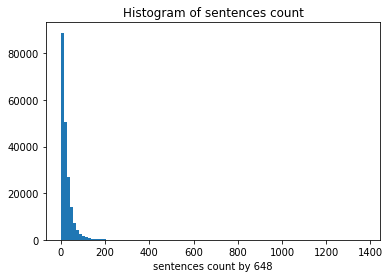

count    200000.000000
mean         24.624450
std          30.445946
min           0.000000
25%           7.000000
50%          16.000000
75%          32.000000
max        1376.000000
Name: n_sentences_by_648, dtype: float64


In [26]:
#将3750,900,648分别当做句号
for char in ['3750','900','648',]:
    train['n_sentences_by_{}'.format(char)] = train['text'].apply(lambda x:Counter(x.split(' '))[char])
    _ = plt.hist(train['n_sentences_by_{}'.format(char)], bins=100) 
    plt.xlabel('sentences count by {}'.format(char))
    plt.title("Histogram of sentences count")
    plt.show()
    print(train['n_sentences_by_{}'.format(char)].describe())

2.统计每类新闻中出现次数最多的字符

In [27]:
grouped = train[['label','text']].groupby('label')
# word_count_in_label = {}
for name, group in grouped:
    all_lines = ' '.join(list(group.text))
    word_count = Counter(all_lines.split(' '))
    # word_count_in_label[name] = word_count
    print("标签为{:>2d}组，出现次数最多的五个字符为{}".format(name, word_count.most_common(5)))

标签为 0组，出现次数最多的五个字符为[('3750', 1267331), ('648', 967653), ('900', 577742), ('3370', 503768), ('4464', 307431)]
标签为 1组，出现次数最多的五个字符为[('3750', 1200686), ('648', 714152), ('3370', 626708), ('900', 542884), ('4464', 445525)]
标签为 2组，出现次数最多的五个字符为[('3750', 1458331), ('648', 974639), ('900', 618294), ('7399', 351894), ('6122', 343850)]
标签为 3组，出现次数最多的五个字符为[('3750', 774668), ('648', 494477), ('900', 298663), ('6122', 187933), ('4939', 173606)]
标签为 4组，出现次数最多的五个字符为[('3750', 360839), ('648', 231863), ('900', 190842), ('4411', 120442), ('7399', 86190)]
标签为 5组，出现次数最多的五个字符为[('3750', 715740), ('648', 329051), ('900', 305241), ('6122', 159125), ('5598', 136713)]
标签为 6组，出现次数最多的五个字符为[('3750', 469540), ('648', 345372), ('900', 222488), ('6248', 193757), ('2555', 175234)]
标签为 7组，出现次数最多的五个字符为[('3750', 428638), ('648', 262220), ('900', 184131), ('3370', 159156), ('5296', 132136)]
标签为 8组，出现次数最多的五个字符为[('3750', 242367), ('648', 202399), ('900', 92207), ('6122', 57345), ('4939', 56147)]
标签为 9组，出现次数最多的五个字符为[('3750', 